In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore') 

# 정규분포 (가우시안분포, Z-분포)

$$ \mathcal{N}(x; \mu, \sigma^2) = \dfrac{1}{\sqrt{2\pi\sigma^2}} \exp \left(-\dfrac{(x-\mu)^2}{2\sigma^2}\right) $$

## 분포 그래프 확인

In [3]:
xx = np.linspace(-5, 5, 100)
rv = sp.stats.norm(loc=0, scale=1)

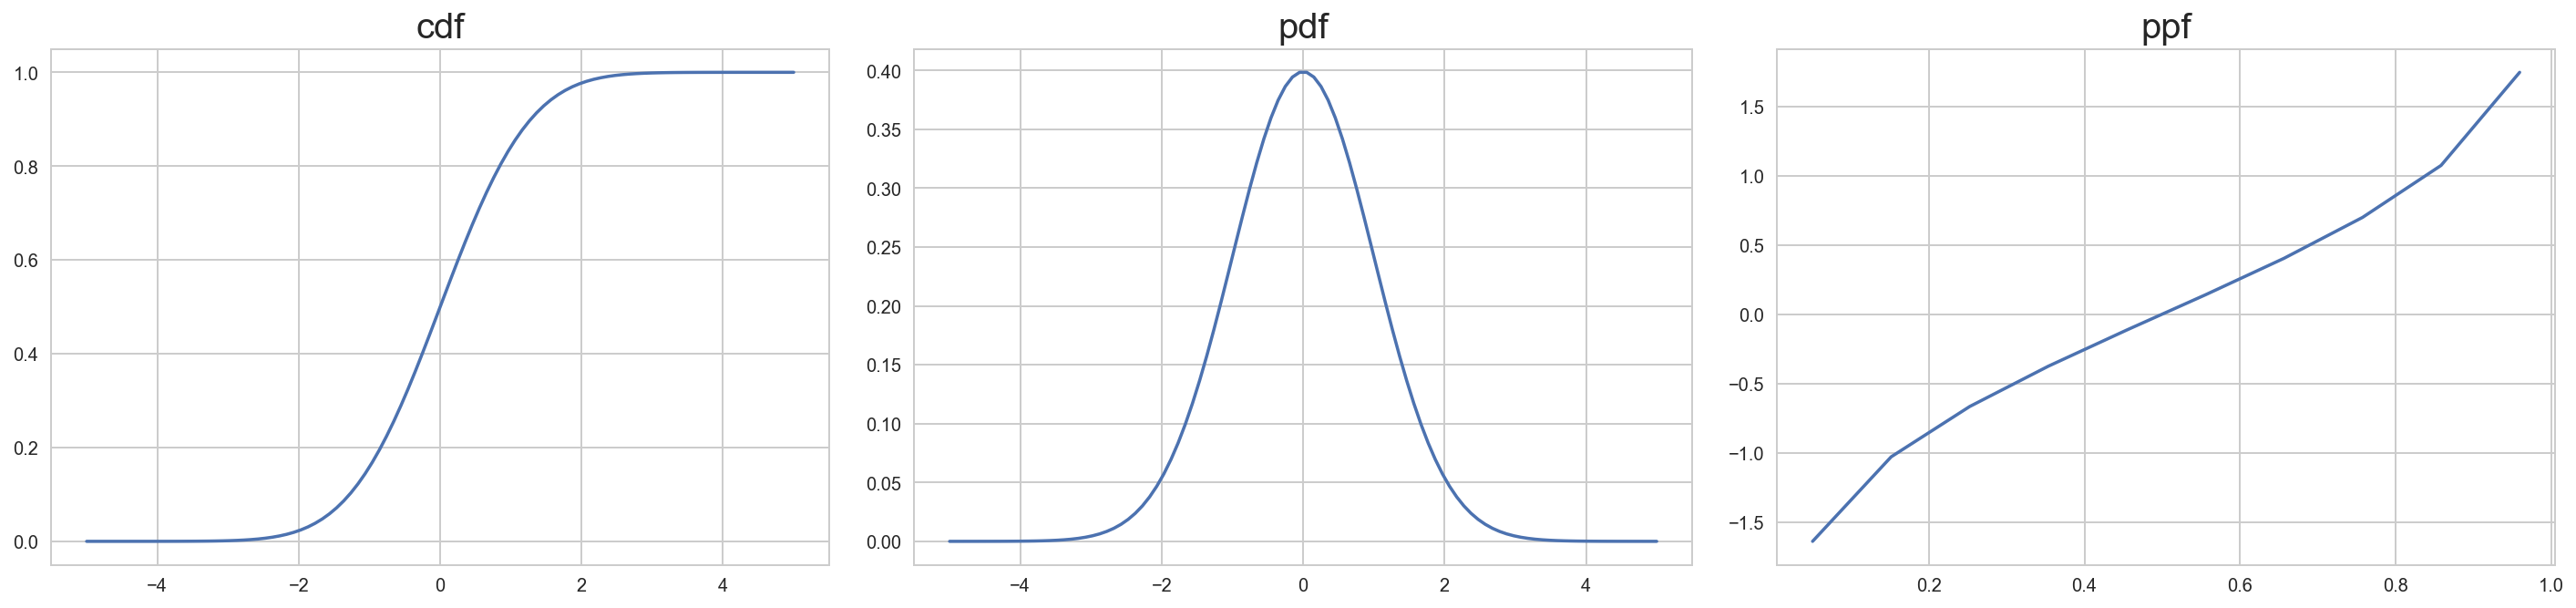

In [4]:
cdf = rv.cdf(xx) # 누적분포함수 Cumulative distribution function.
pdf = rv.pdf(xx) # 확률밀도함수 Probability density function.
ppf = rv.ppf(xx) # 백분율함수 Percent point function (inverse of cdf — percentiles).

row=3
col=1

plt.figure(figsize=(20, 5))
plt.subplot(col, row, 1)
plt.plot(xx, cdf); plt.title("cdf", size=20)

plt.subplot(col, row, 2)
plt.plot(xx, pdf); plt.title("pdf", size=20)

plt.subplot(col, row, 3)
plt.plot(xx, ppf); plt.title("ppf", size=20)

plt.tight_layout(h_pad=1, pad=2)
plt.show()

## scipy.stats.norm 함수 사용법
> Link : [공식문서](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)

In [5]:
# 확률의 z 통계량 구하기
sp.stats.norm.ppf(0.01)

-2.3263478740408408

In [6]:
# z 통계량의 확률값 구하기
sp.stats.norm.cdf(-2.3263478740408408)

0.01

In [7]:
# z 통계량의 분포의 기울기값 구히기
sp.stats.norm.pdf([-3, 0, 3])

array([0.00443185, 0.39894228, 0.00443185])

$ -1\sigma $ ~ $1\sigma $ 구간의 확률 구하기

In [30]:
sol1 = sp.stats.norm.cdf(1) - sp.stats.norm.cdf(-1)
sol2 = 1 - (sp.stats.norm.cdf(-1) * 2)
sol1, sol2

(0.6826894921370859, 0.6826894921370859)

0 ~ $2\sigma$ 구간의 확률 구하기

In [31]:
sp.stats.norm.cdf(2)

0.9772498680518208

97.5%의 z값 (유의수준 0.05로 양측검정)

In [46]:
sp.stats.norm.ppf(1-0.05/2) , sp.stats.norm.ppf(0.975) 

(1.959963984540054, 1.959963984540054)

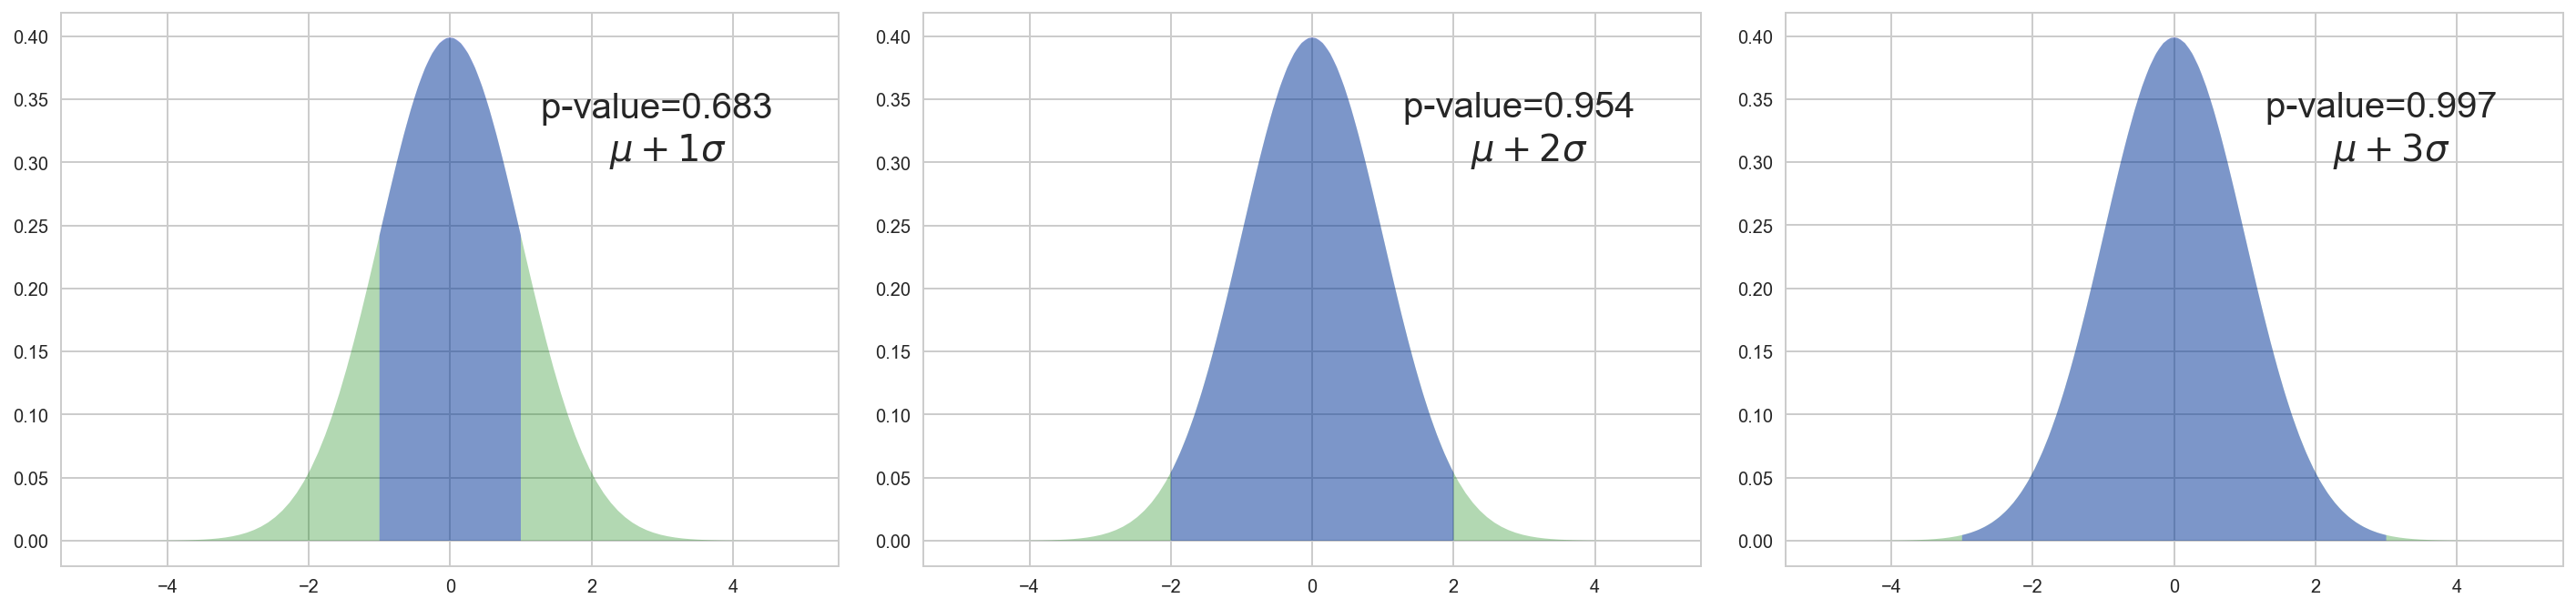

In [25]:
xx3 = np.linspace(-3, 3, 100)
xx2 = np.linspace(-2, 2, 100)
xx1 = np.linspace(-1, 1, 100)

plt.figure(figsize=(20, 5))
plt.subplot(1,3,1)
plt.fill_between(xx, sp.stats.norm.pdf(xx), facecolor='green', alpha=0.3)
plt.fill_between(xx1, sp.stats.norm.pdf(xx1), facecolor='blue', alpha=0.3)
plt.text(3, 0.3, "p-value=%5.3f \n $\mu + 1\sigma$" % (1 - (sp.stats.norm.cdf(-1) * 2)), horizontalalignment='center', size=20)

plt.subplot(1,3,2)
plt.fill_between(xx, sp.stats.norm.pdf(xx), facecolor='green', alpha=0.3)
plt.fill_between(xx2, sp.stats.norm.pdf(xx2), facecolor='blue', alpha=0.3)
plt.text(3, 0.3, "p-value=%5.3f \n $\mu + 2\sigma$" % (1 - (sp.stats.norm.cdf(-2) * 2)), horizontalalignment='center', size=20)

plt.subplot(1,3,3)
plt.fill_between(xx, sp.stats.norm.pdf(xx), facecolor='green', alpha=0.3)
plt.fill_between(xx3, sp.stats.norm.pdf(xx3), facecolor='blue', alpha=0.3)
plt.text(3, 0.3, "p-value=%5.3f \n $\mu + 3\sigma$" % (1 - (sp.stats.norm.cdf(-3) * 2)), horizontalalignment='center', size=20)

plt.tight_layout(pad=2, h_pad=1)
plt.show()

## 시뮬레이션 값으로 정규분포 파악
### 개수가 많아질수록 정규분포를 따른다

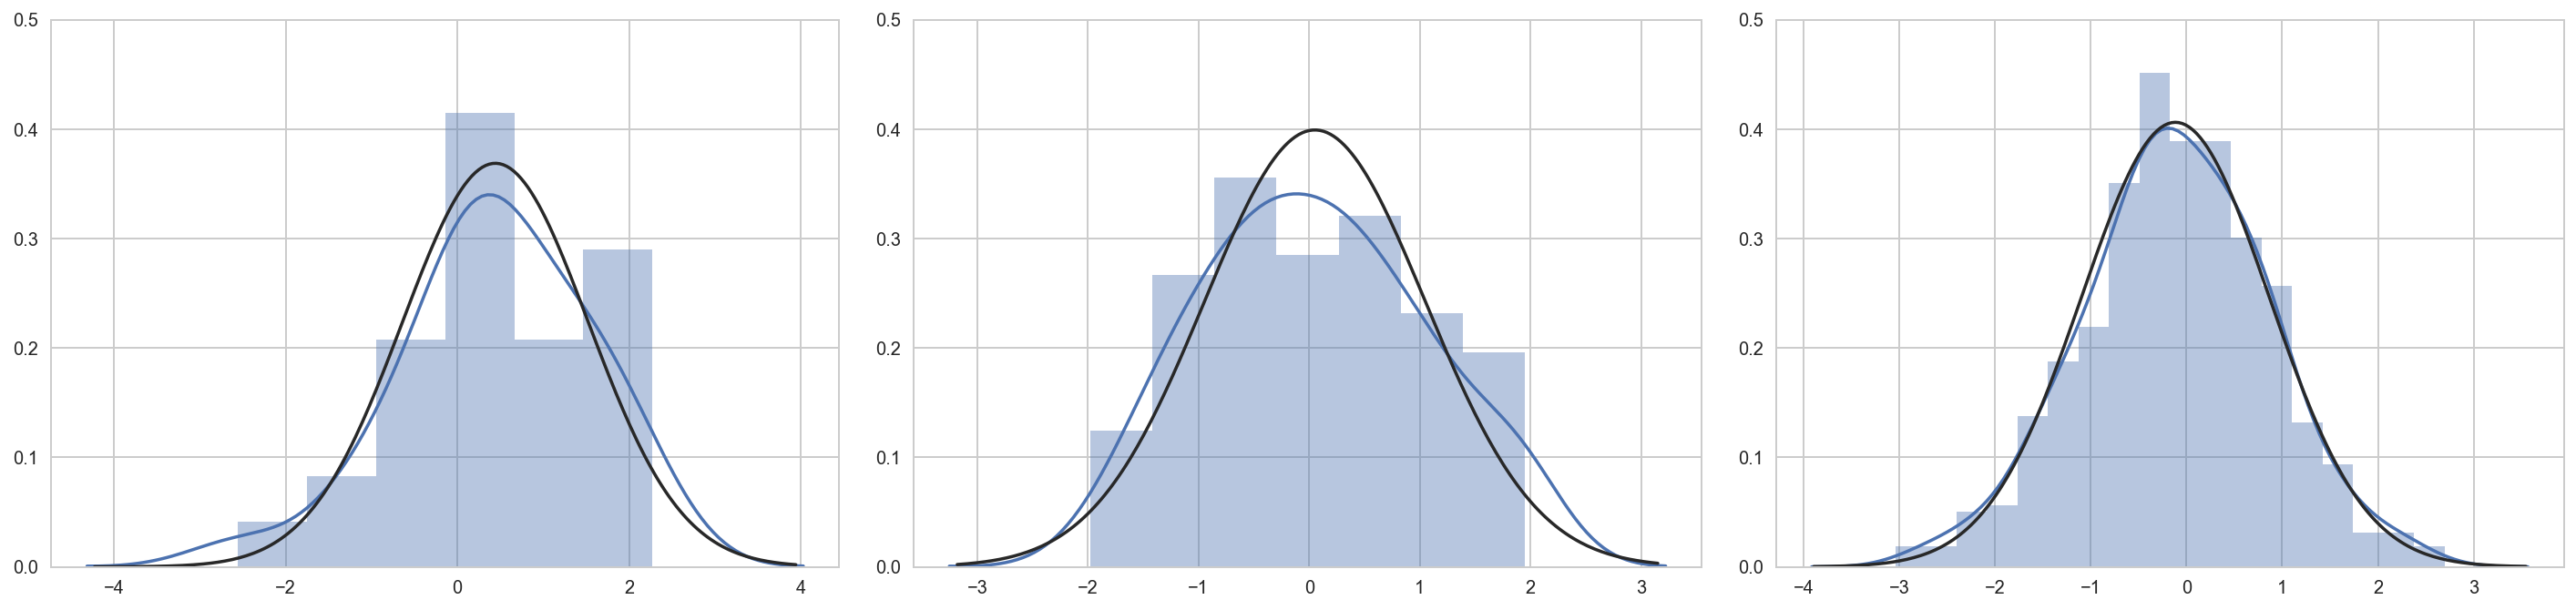

In [165]:
np.random.seed(0)

plt.figure(figsize=(20, 5))
x = rv.rvs(30)
plt.subplot(1, 3, 1)
sns.distplot(x, kde=True, fit=sp.stats.norm)
plt.ylim(0, 0.5)

x = rv.rvs(100)
plt.subplot(1, 3, 2)
sns.distplot(x, kde=True, fit=sp.stats.norm)
plt.ylim(0, 0.5)

x = rv.rvs(500)
plt.subplot(1, 3, 3)
sns.distplot(x, kde=True, fit=sp.stats.norm)
plt.ylim(0, 0.5)

plt.tight_layout(pad=2, h_pad=1)
plt.show()

## 직접 구현하기

In [96]:
def normal(x, mean=0, var=1):
    n = 1/np.sqrt(2 * math.pi * var) * np.exp(- ((x-mean)**2/2*var))
    return n